# MNIST Linear Classification Reference Test

In [1]:
import requests
import math
import numpy
from helpers.basis_helper import parse_basis, normalize
from helpers.tf_qsoftmax import qsoftmax

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Setting a lower bound
This is the basic linear classifier except we cheat a little by using the `softmax` and the crossentropy loss function. Normally we'd just use MSE, by doing this we can easily measure the accuracy with the built in capabilities.

This should be a lower bound for performance so anything worse than this should be considered really bad. It also assesses how difficult a proble this classification is.


In [3]:
linear_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Next we compile and fit both models

In [4]:
linear_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
linear_model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test), verbose=0)

## We display some results
### The validation loss tells us how well the training went

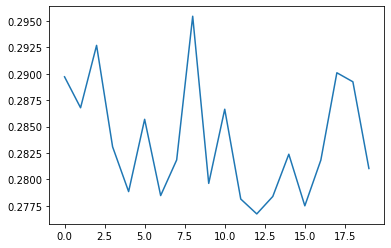

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(linear_model.history.history['val_loss'])

### Print the final results in big bold text

In [7]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    linear_model.history.history['val_accuracy'][-1]*100.,
    linear_model.history.history['accuracy'][-1]*100)
display(Markdown(f"# {text}"))

# The accuracy is 92.320% for the test set and 92.515% for the training set

In [8]:
text

'The accuracy is 92.320% for the test set and 92.515% for the training set'